In [1]:
import warnings
warnings.filterwarnings("ignore")

from model import *
from keras.utils import plot_model

Using TensorFlow backend.


### Load .csv file, print head and tail of the used columns

In [2]:
df = read_csv()

In [3]:
df.head()

,center,left,right,steering
0,IMG/center_2019_09_14_10_46_34_907.jpg,IMG/left_2019_09_14_10_46_34_907.jpg,IMG/right_2019_09_14_10_46_34_907.jpg,-0.141177
1,IMG/center_2019_09_14_10_46_34_973.jpg,IMG/left_2019_09_14_10_46_34_973.jpg,IMG/right_2019_09_14_10_46_34_973.jpg,-0.141177
2,IMG/center_2019_09_14_10_46_35_053.jpg,IMG/left_2019_09_14_10_46_35_053.jpg,IMG/right_2019_09_14_10_46_35_053.jpg,-0.141177
3,IMG/center_2019_09_14_10_46_35_132.jpg,IMG/left_2019_09_14_10_46_35_132.jpg,IMG/right_2019_09_14_10_46_35_132.jpg,-0.123529
4,IMG/center_2019_09_14_10_46_35_203.jpg,IMG/left_2019_09_14_10_46_35_203.jpg,IMG/right_2019_09_14_10_46_35_203.jpg,-0.123529


In [4]:
df.tail()

,center,left,right,steering
5278,IMG/center_2019_09_14_11_48_10_152.jpg,IMG/left_2019_09_14_11_48_10_152.jpg,IMG/right_2019_09_14_11_48_10_152.jpg,0.029412
5279,IMG/center_2019_09_14_11_48_10_237.jpg,IMG/left_2019_09_14_11_48_10_237.jpg,IMG/right_2019_09_14_11_48_10_237.jpg,0.035294
5280,IMG/center_2019_09_14_11_48_10_321.jpg,IMG/left_2019_09_14_11_48_10_321.jpg,IMG/right_2019_09_14_11_48_10_321.jpg,0.035294
5281,IMG/center_2019_09_14_11_48_10_403.jpg,IMG/left_2019_09_14_11_48_10_403.jpg,IMG/right_2019_09_14_11_48_10_403.jpg,0.000000
5282,IMG/center_2019_09_14_11_48_10_591.jpg,IMG/left_2019_09_14_11_48_10_591.jpg,IMG/right_2019_09_14_11_48_10_591.jpg,0.000000


### Load and plot example images

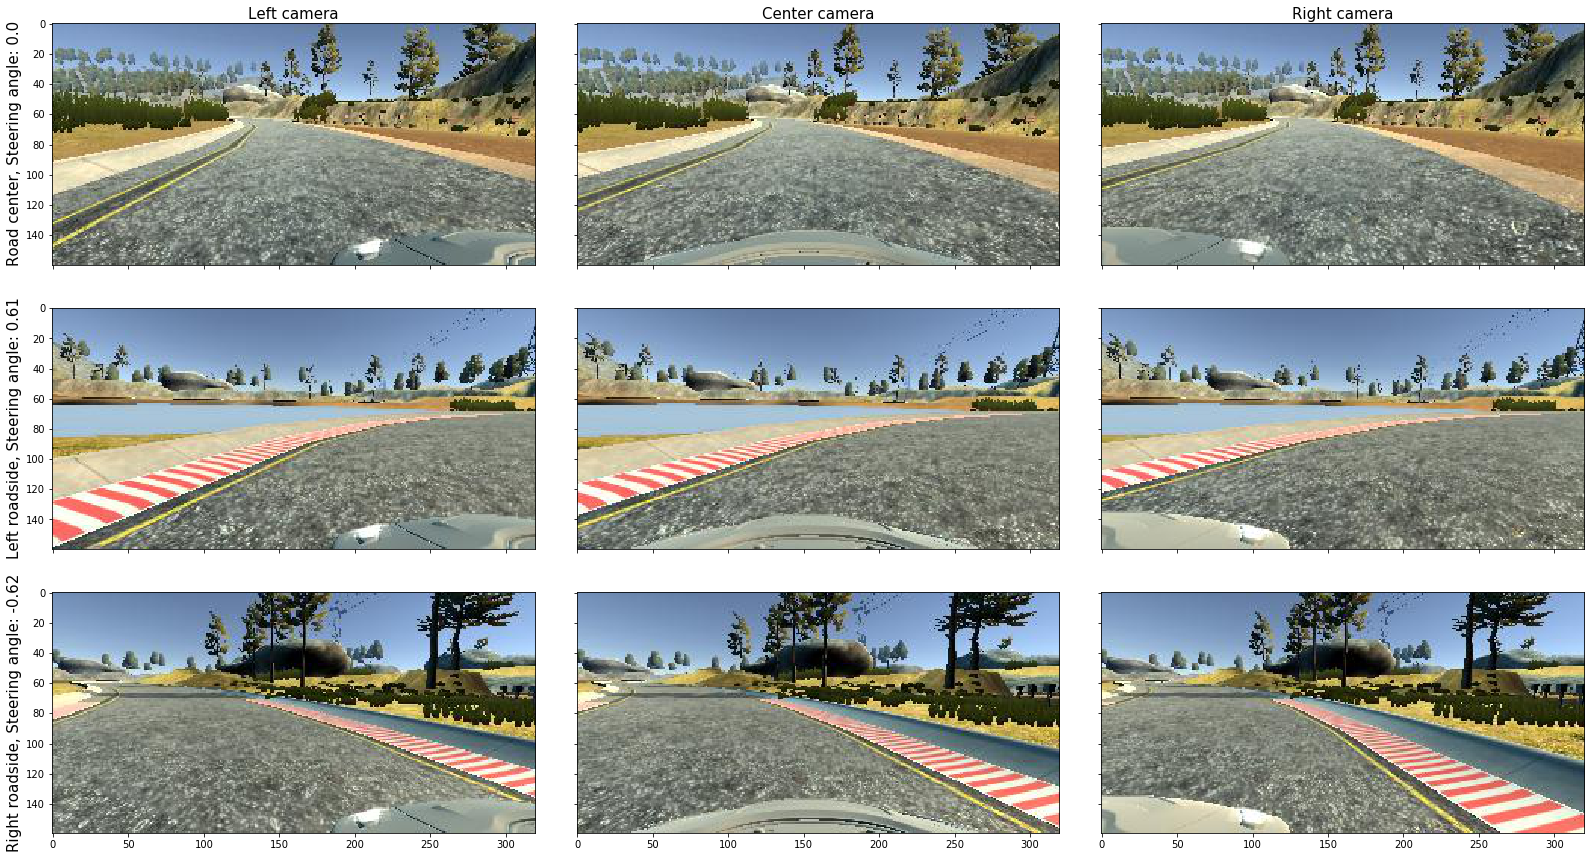

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(22,12))
plt.tight_layout()

idx_roadside_middle = df.steering.index[df.steering==0][0]
idx_roadside_left = df.steering.idxmax()
idx_roadside_right = df.steering.idxmin()

fontsize = 15

axs[0, 0].imshow(plt.imread(path+df['left'][idx_roadside_middle]))
axs[0, 0].set_title('Left camera', fontsize=fontsize)
axs[0, 0].set_ylabel('Road center, Steering angle: {}'.format(df.steering.iloc[idx_roadside_middle]), fontsize=fontsize)

axs[0, 1].imshow(plt.imread(path+df['center'][idx_roadside_middle]))
axs[0, 1].set_title('Center camera', fontsize=fontsize)

axs[0, 2].imshow(plt.imread(path+df['right'][idx_roadside_middle]))
axs[0, 2].set_title('Right camera', fontsize=fontsize)

axs[1, 0].imshow(plt.imread(path+df['left'][idx_roadside_left]))
axs[1, 0].set_ylabel('Left roadside, Steering angle: {0:.2}'.format(df.steering.iloc[idx_roadside_left]), fontsize=fontsize)

axs[1, 1].imshow(plt.imread(path+df['center'][idx_roadside_left]))

axs[1, 2].imshow(plt.imread(path+df['right'][idx_roadside_left]))

axs[2, 0].imshow(plt.imread(path+df['left'][idx_roadside_right]))
axs[2, 0].set_ylabel('Right roadside, Steering angle: {0:.2}'.format(df.steering.iloc[idx_roadside_right]), fontsize=fontsize)

axs[2, 1].imshow(plt.imread(path+df['center'][idx_roadside_right]))

axs[2, 2].imshow(plt.imread(path+df['right'][idx_roadside_right]))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Plot histogram and angle over time of original data

In [6]:
df = read_csv()

# print('Size of original data set: ', len(df))

# (counts, bins, _) = plt.hist(df.steering, bins=n_bins)
# plt.title('Histogram: original data')
# plt.xlabel('Steering angle')
# plt.ylabel('Counts')
# plt.show()

# plt.plot(df.steering)
# plt.title('Steering angle over time')
# plt.xlabel('Time samples')
# plt.ylabel('Steering anlge')
# plt.show()


### Plot histogram and angle over time of augmented data

In [7]:
# df_aug = augment_data(df)

# print('Size of augmented data set: ', len(df_aug))

# plt.hist(df_aug.steering, bins=bins)
# plt.title('Histogram: augmented data')
# plt.xlabel('Steering angle')
# plt.ylabel('Counts')
# plt.show()

# plt.plot(df_aug.steering)
# plt.title('Steering angle over time')
# plt.xlabel('Time samples')
# plt.ylabel('Steering anlge')
# plt.show()

Size of raw data set:  5283
Size of augmented data set:  8269


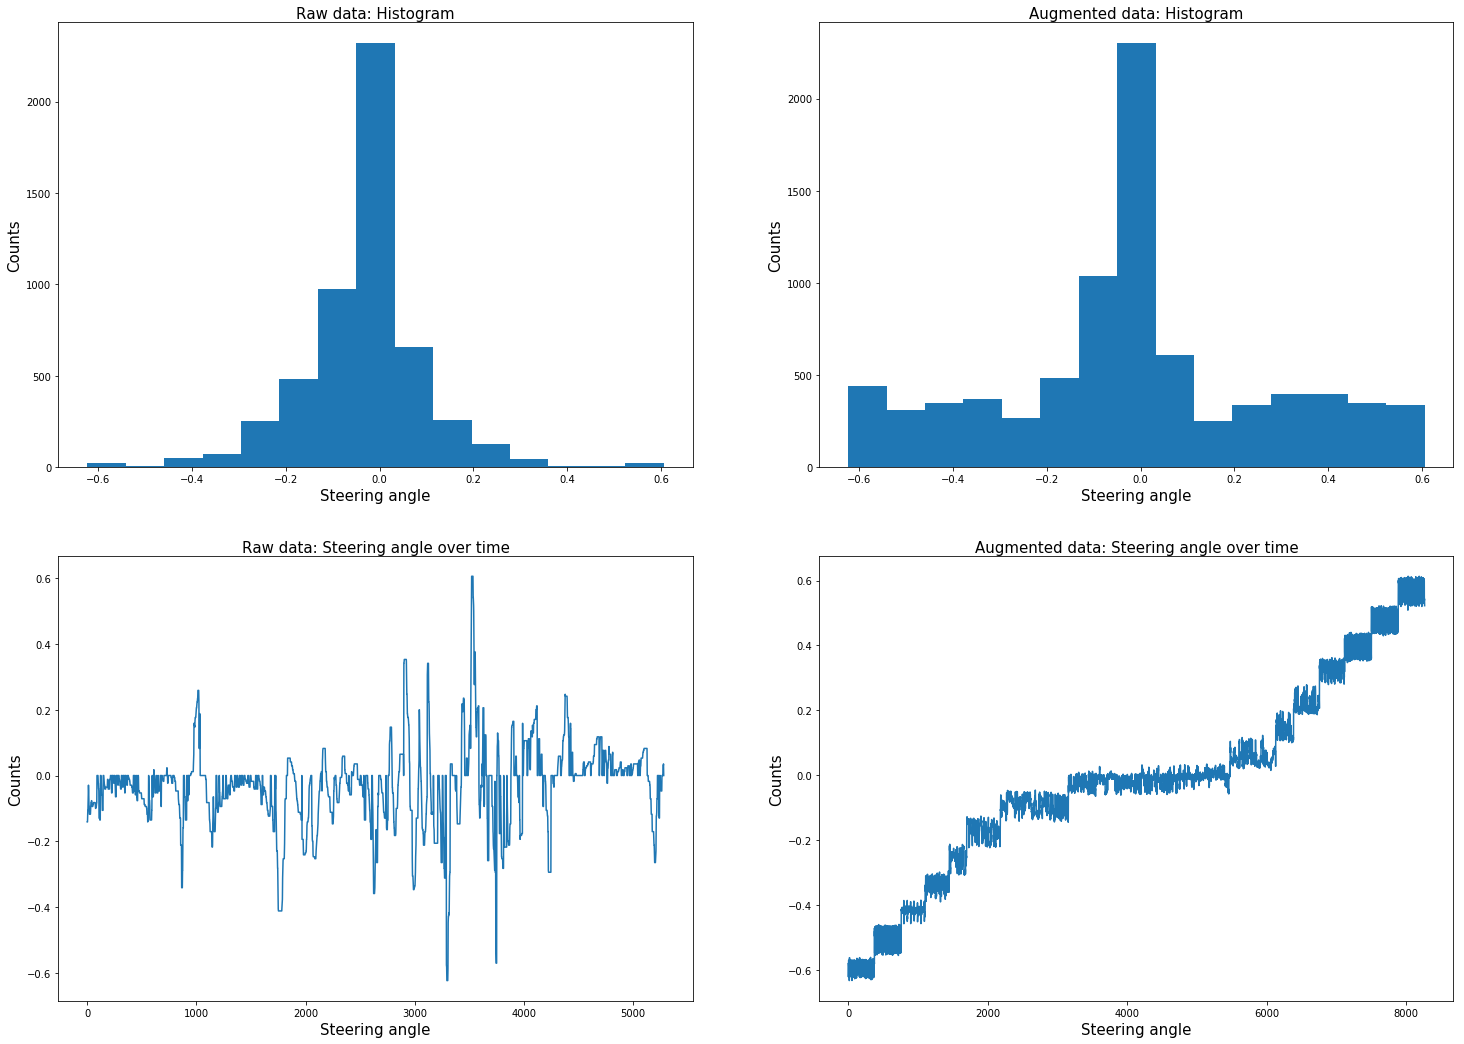

In [8]:
df_aug = augment_data(df)
print('Size of raw data set: ', len(df))
print('Size of augmented data set: ', len(df_aug))


fig, axs = plt.subplots(2, 2, figsize=(25,18))
# plt.tight_layout()

fontsize2 = 15

(counts, bins, _) = axs[0,0].hist(df.steering, bins=n_bins)
axs[0,0].set_title('Raw data: Histogram', fontsize=fontsize2)
axs[0,0].set_xlabel('Steering angle', fontsize=fontsize2)
axs[0,0].set_ylabel('Counts', fontsize=fontsize2)

axs[1,0].plot(df.steering)
axs[1,0].set_title('Raw data: Steering angle over time', fontsize=fontsize2)
axs[1,0].set_xlabel('Steering angle', fontsize=fontsize2)
axs[1,0].set_ylabel('Counts', fontsize=fontsize2)

axs[0,1].hist(df_aug.steering, bins=bins)
axs[0,1].set_title('Augmented data: Histogram', fontsize=fontsize2)
axs[0,1].set_xlabel('Steering angle', fontsize=fontsize2)
axs[0,1].set_ylabel('Counts', fontsize=fontsize2)

axs[1,1].plot(df_aug.steering)
axs[1,1].set_title('Augmented data: Steering angle over time', fontsize=fontsize2)
axs[1,1].set_xlabel('Steering angle', fontsize=fontsize2)
axs[1,1].set_ylabel('Counts', fontsize=fontsize2);

### Plot model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 160, 3)        0         
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 80, 160, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 38, 78, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 37, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 17, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 15, 64)        

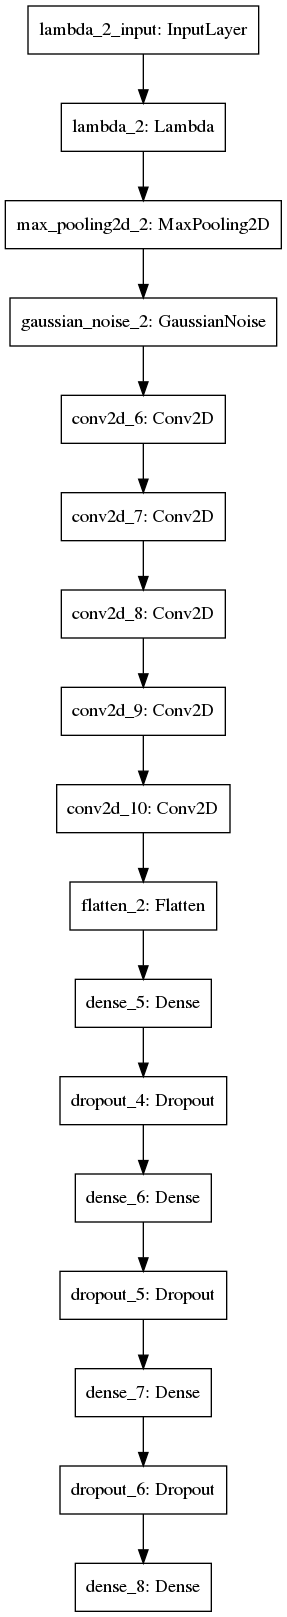

In [10]:
model = def_model()

model.summary()

plot_model(model, to_file='model.png')